# Обработка пропущенных значений

---

**Источники:**

[Working with Missing Data in Machine Learning](https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce)

[Python | Visualize missing values (NaN) values using Missingno Library](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

[Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

[10 лайфхаков для работы с библиотекой Pandas](https://medium.com/nuances-of-programming/10-%D0%BB%D0%B0%D0%B9%D1%84%D1%85%D0%B0%D0%BA%D0%BE%D0%B2-%D0%B4%D0%BB%D1%8F-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B-%D1%81-%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%BE%D0%B9-pandas-e88c95ebec63)

[Missing data](https://en.wikipedia.org/wiki/Missing_data)

[Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

[ODSC-missing-data-may-18](https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf)

[Statistical test for MCAR in python…](https://towardsdatascience.com/statistical-test-for-mcar-in-python-9fb617a76eac)

[Full Information Maximum Likelihood Estimation for Latent Variable Interactions With Incomplete Indicators](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5489914/)

[Simple techniques for missing data imputation](https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation)

[6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples)](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

[How to Handle Missing Data in Machine Learning: 5 Techniques](https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651)

[Imputation (statistics)](https://en.wikipedia.org/wiki/Imputation_(statistics))

[RT 2: Missing Data](https://www.lancaster.ac.uk/stor-i-student-sites/tessa-wilkie/wp-content/uploads/sites/14/2020/05/RT2__Missing_Data_TW_1.5_spacing.pdf)

[Handling missing data MCAR, MAR and MNAR (Part I)](https://www.kaggle.com/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i)

[matthewbrems/missing-data-workshop](https://github.com/matthewbrems/missing-data-workshop)

[Your Ultimate Data Manipulation & Cleaning Cheat Sheet](https://towardsdatascience.com/your-ultimate-data-manipulation-cleaning-cheat-sheet-731f3b14a0be)

[Pandas_Cheat_Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[Handling Missing Data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

[Computations / descriptive stats](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats)

[Missing data handling](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#missing-data-handling)

[Missing Value Imputation – A Review](https://www.kdnuggets.com/2020/09/missing-value-imputation-review.html)

[Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html#imputation-of-missing-values)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy missingno scikit-learn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import sklearn

sklearn.__version__

'0.24.1'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import missingno as msno

msno.__version__

'0.4.2'

## Загрузка данных

[Источник (Wine Reviews)](https://www.kaggle.com/zynicide/wine-reviews/data)

In [9]:
df = pd.read_csv('../../data/winemag-data-130k-v2.csv', index_col=0)

# показать все колонки
pd.options.display.max_columns = None

# отобразить первые 5 и последние 5 строк
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Пропущенные значения в `pandas`

Поскольку данные бывают разных форм, `pandas` стремится быть гибким в отношении обработки недостающих (missing) данных.

Хотя `NaN` (Not a Number) является маркером отсутствующего значения по умолчанию из соображений скорости вычислений и удобства, нужно иметь возможность легко обнаруживать это значение в данных разных типов: с плавающей запятой (float), целыми числами (int), логическими значениями (boolean) и объектами (object).

Однако во многих случаях в Python присутствует значение `None`, и мы также необходимо понимать как "отсутствует" ("missing") или "недоступно" (`NA`, not available).

Также может потребоваться рассматривать бесконечность (`inf` и `-inf`) как `NA` в вычислениях. Для этого необходимо установить параметр `use_inf_as_na`:
```
pandas.options.mode.use_inf_as_na = True
```

## Обнаружение пропущенных значений

In [10]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,This zesty red has pretty aromas that suggest ...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# сколько пропущенных значений в каждом столбце
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [12]:
# сколько пропущенных значений в каждом столбце
# псевдоним для isna
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
# сколько заполненных значений в каждом столбце
df.notna().sum()

country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

<AxesSubplot:>

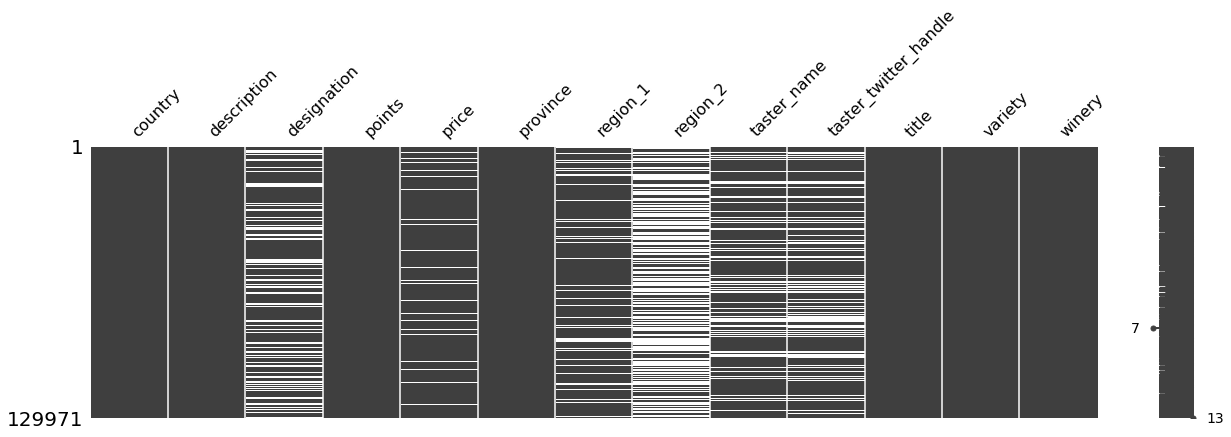

In [14]:
# missingno matrix
msno.matrix(df, figsize=(20, 5))

<AxesSubplot:>

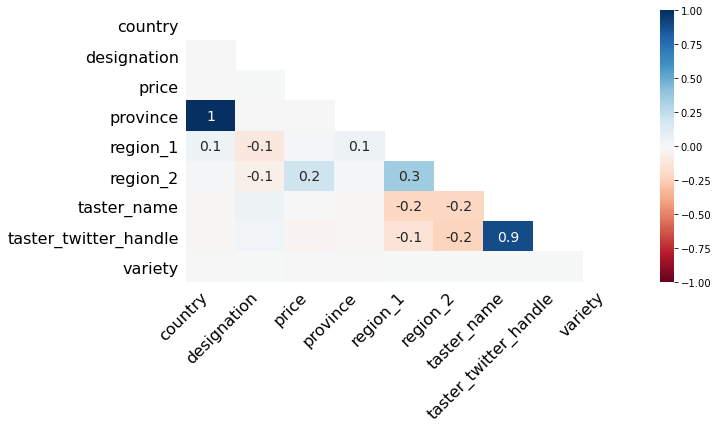

In [15]:
# missingno heatmap
msno.heatmap(df, figsize=(10, 5))

<AxesSubplot:>

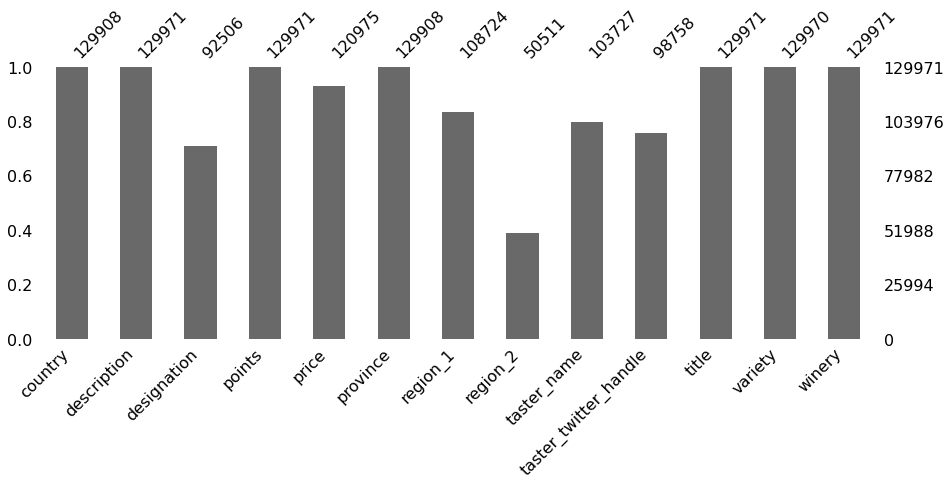

In [16]:
# missingno bar
msno.bar(df, figsize=(15, 5))

## Источники пропущенных значений

Некоторые типичные причины отсутствия данных:
- Пользователь забыл заполнить поле.
- Данные были потеряны при переносе в ручную из устаревшей базы данных.
- Произошла ошибка в ПО.
- Пользователи предпочли не заполнять поля, в связи с их представлениями о том, как будут использоваться или интерпретироваться результаты.


Некоторые из этих источников — просто случайные ошибки. В других случаях может быть более глубокая причина отсутствия данных.

Важно понимать эти различные типы недостающих данных с точки зрения статистики.

Тип отсутствующих данных будет влиять на то, как нужно заполнять недостающие значения.

## Подходы к устранению пропущенных значений

- Избегать (**avoid**)
    - Полное отсутствие недостающих данных позволяет нам уменьшить неопределенность.
    - Обычно дешевле потратить время на то, чтобы избежать недостающих данных, чем строить догадки о том, как лучше их заполнить.
    - Если можно избежать пропущенных данных, то это делает последующие действия намного проще.
- Игнорировать (**ignore**)
- Давать объяснение (**account for**)

## Типы пропущенных значений


### Пропущен блок (**Unit** Nonresponse) / Пропущен элемент (**Item** Nonresponse)

- **Unit Nonresponse** - это когда значения из
наблюдения не наблюдаются.

    - Пример: 1000 действительных номеров телефонов в США для проведения опроса. Опрос на английском языке, НО некоторые люди по этим номерам не знают английского и не могут ответить ни на один вопрос.


- **Item Nonresponse** - это когда пропущены некоторые, но не все значения из наблюдения.

    - Пример: 1000 действительных номеров телефонов в США для проведения опроса. Опрос на английском языке. Опрос включает в себя много вопросов, в том числе про возраст, вес и доход. Некоторые люди не хотят отвечать на вопрос про доход или вес или возраст, а на некоторые другие дают ответы.

### Как можно **избежать**?

Например, обращать внимание на:
- Нагрузку респондентов (например, количество вопросов в опросе).
- Метод сбора данных (например, удобство заполнения анкеты).
- Доступность (например, вопросы составлены понятно и достаточно коротко).
- Время проведения исследования (например, проводить опрос в удобное время без принуждения).

### Как можно **игнорировать**?
- Просто предположить, что выборка из респондентов достаточна для выводов.
- **Полный анализ случаев (Complete-Case Analysis)**. Отбрасываются любое наблюдение с любым пропущенным значением. 
    - Преимущества: 
        - Простейший вариант, экономия времени.
        - Если не много, то может не повлиять на результаты.
        - Обычно это вариант "по умолчанию".
    - Недостатки:
        - Можно отбросить некоторые необходимые данные.
        - Снижается точность модели, особенно, если исключенных данных становится больше.
        - Можно упустить возможность определить паттерн пропуска значений, улучшить качество.
- **Анализ доступных случаев (Available-Case Analysis)**. Не отбрасывать никаких наблюдений и вычисляет результаты на основе имеющихся данных.
    - Преимущества: 
        - Используются все доступные данные.
    - Недостатки:
        - Можно получить "не очень хорошие результаты", плохие матрицы ковариации/корреляции.

#### Удаление пропущенных значений

Метод [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) по умолчанию удаляет строки (аргумент `axis=0`), которые содержат пропущенные значения. Можно передать аргумент `axis='columns'` для удаления всех столбцов содержащих пропущенные значения.

##### Удалить ячейки с пропущенными значениями из `Series`

In [17]:
# количество пропущенных значений
df.price.isna().sum()

8996

In [18]:
# пропущенные значения считаются
df.price.size

129971

In [19]:
# пропущенные значения НЕ считаются
df.price.count()

120975

In [20]:
# удалить все пропущенные записи в колонке price и 
# сохранить результат в новой переменной
df_price_without_na = df.price.dropna()
df_price_without_na.isna().sum()

0

In [21]:
# пропущенные значения считаются, НО их нет
df_price_without_na.size

120975

##### Удалить КОЛОНКИ с пропущенными значениями из `DataFrame`

In [22]:
df.columns.tolist()

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [23]:
# количество пропущенных значений
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [24]:
# пропущенные значения НЕ считаются
df.count()

country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [25]:
# удалить все КОЛОНКИ с пропущенными ячейками
# сохранить результат в новой переменной
df_without_na = df.dropna(axis='columns')

In [26]:
df_without_na.columns.tolist()

['description', 'points', 'title', 'winery']

In [27]:
df_without_na.isna().sum()

description    0
points         0
title          0
winery         0
dtype: int64

In [28]:
# пропущенные значения НЕ считаются
df_without_na.count()

description    129971
points         129971
title          129971
winery         129971
dtype: int64

##### Удалить СТРОКИ с пропущенными значениями из `DataFrame`

In [29]:
df.columns.tolist()

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [30]:
# количество пропущенных значений
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [31]:
# пропущенные значения НЕ считаются
df.count()

country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64

In [32]:
# удалить все СТРОКИ с пропущенными ячейками
# сохранить результат в новой переменной
df_without_na = df.dropna(axis='rows')

In [33]:
df_without_na.columns.tolist()

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [34]:
df_without_na.isna().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [35]:
# пропущенные значения НЕ считаются
df_without_na.count()

country                  22387
description              22387
designation              22387
points                   22387
price                    22387
province                 22387
region_1                 22387
region_2                 22387
taster_name              22387
taster_twitter_handle    22387
title                    22387
variety                  22387
winery                   22387
dtype: int64

### Как можно дать **объяснение**?

- Удостовериться, что имеющиеся данные отражают интересующую выборку. Вычислить пропорции ответов (например, сколько мужчин и женщин в выборке с ответами). Необходимо знать "истинное" распределение (это часто нереально).

- Замещение (**Imputation**).

    - Предполагаем, что при использовании валидного метода замещения, не формируется "выдуманных" данных. То есть проводится анализ с соответствующей оценкой дисперсии, что позволяет вычислить истинную степень неопределенность, которая имеется в результатах замещения.
    - Если просто замещать данные, чтобы иметь "полный" датасет для дальнейшего анализа, то есть происходит несколько замещений, затем какое-то количество анализа, а затем результаты объединяются, то необходимо быть осторожным: после формирования такого датасета никто не будет знать различий между реальным датасетом и датасетом после замещений.

#### **Deductive Imputation**

**Использовать логические отношения для заполнения пропущенных значений.**

**Пример**: Респондент отвечает, что не был жертвой преступления (колонка "жертва преступления" содержит `False`), но в колонка "жертва финансового преступления" содержит `NA`. Можно сделать вывод, что респондент пропустил вопрос из-за "дублирования" и туда тоже можно подставить `False`.

**Пример**: Если у кого-то есть 2 ребенка в 2017 году, `NA` ребенка в 2018 и 2 ребенка в 2019 году, то можно предположить, что в 2018 тоже было 2 ребенка (хотя нет 100% гарантии).

**Преимущества**:
- Не требует "инференса" модели.
- Истинные значения могут быть оценены.
- *Валидный (обоснованный, достоверный) метод*

**Недостатки**:
- Может быть трудоемким или требовать дополнительной разработки.
- Человеческий фактор, можно что-то не так понять и сделать ошибочный вывод.

##### `pandas.Series.fillna`

[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html#pandas.Series.fillna)


In [36]:
# сколько ячеек из колонки пропущено
df.designation.isnull().sum()

37465

In [37]:
# предположим, что можно логическим путем вывести значение designation
# допустим, что это Magic
designation_filled = df.designation.fillna("Magic")

In [38]:
# сколько ячеек из колонки пропущено
designation_filled.isnull().sum()

0

In [39]:
# сколько ячеек из колонки имеет значение Magic
designation_filled[designation_filled == 'Magic'].count()

37465

##### `pandas.Series.replace`

[replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [40]:
# сколько ячеек из колонки пропущено
df.region_1.isnull().sum()

21247

In [41]:
# предположим, что можно логическим путем вывести значение region_1
# допустим, что это Earth
# заменить значения np.nan в колонке price на медиану
region_1_replace = df.region_1.replace(to_replace=np.nan, 
                                     value="Earth")

In [42]:
# сколько ячеек из колонки price пропущено
region_1_replace.isnull().sum()

0

In [43]:
# сколько ячеек из колонки имеет значение Earth
region_1_replace[region_1_replace == 'Earth'].count()

21247

##### `sklearn.impute.SimpleImputer`

[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [44]:
# сколько ячеек из колонки пропущено
df.region_2.isnull().sum()

79460

In [45]:
imp_const = sklearn.impute.SimpleImputer(missing_values=np.nan, 
                          strategy='constant',
                          fill_value='Nobody knows')
imp_const

AttributeError: module 'sklearn' has no attribute 'impute'

In [ ]:
region_2_imp = imp_const.fit_transform(df[["region_2"]])
region_2_imp

In [ ]:
region_2_imp = pd.DataFrame(region_2_imp, 
                            columns = [df.region_2.name])
region_2_imp

In [ ]:
# сколько ячеек из колонки пропущено
region_2_imp.isnull().sum()

In [ ]:
# сколько ячеек из колонки имеет значение Nobody knows
region_2_imp[region_2_imp == 'Nobody knows'].count()

#### **Mean/Median/Mode Imputation**

**Для любого значения `NA` в столбце заменить `NA` средним значением (медианой или модой) этого столбца.**

**Преимущества**:
- Простота реализации и понимания.
- Иногда кажется разумным.

**Недостатки**:
- Значительно искажает гистограмму (и kde),
недооценивает дисперсию (variance), среднее и медианное значение,
т.е. даст очень разные результаты для ассиметричных данных.
- *Невалидный (недостоверный, необоснованный) метод*.

##### `pandas.Series.fillna`

[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html#pandas.Series.fillna)


In [ ]:
df.price.mean()

In [ ]:
# вычислить значение медианы для колонки
price_median = df.price.median()
price_median

In [ ]:
# заменить все пропущенные значения в колонке price на медиану
price_filled = df.price.fillna(price_median)

In [ ]:
price_filled.median()

In [ ]:
price_filled.mean()

In [ ]:
# сколько ячеек из колонки price пропущено
price_filled.isnull().sum()

##### `pandas.Series.replace`

[replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [ ]:
# вычислить значение медианы для колонки
price_mean = df.price.mean()
price_mean

In [ ]:
# предположим, что можно логическим путем вывести значение region_1
# допустим, что это Earth
# заменить значения np.nan в колонке price на медиану
price_replace = df.price.replace(to_replace=np.nan, 
                                 value=price_mean)

In [ ]:
price_replace.median()

In [ ]:
price_replace.mean()

In [ ]:
# сколько ячеек из колонки price пропущено
price_replace.isnull().sum()

##### *`pandas.Series.interpolate`

[interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html#pandas.Series.interpolate)

In [ ]:
# заполнить с помощью *интерполяции
new_price_interp = df.price.interpolate(method='values')

In [ ]:
# после интерполяции будет оставаться одно пропущенное значение
new_price_interp.isnull().sum()

##### `sklearn.impute.SimpleImputer`

[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [ ]:
# сколько ячеек из колонки пропущено
df.price.isnull().sum()

In [ ]:
# strategy: mean, median, most_frequent, constant
imp_frequent = sklearn.impute.SimpleImputer(missing_values=np.nan,
                                            strategy='most_frequent')
imp_frequent

In [ ]:
price_imp = imp_frequent.fit_transform(df[["price"]])
price_imp

In [ ]:
price_imp = pd.DataFrame(price_imp, 
                         columns = [df.price.name])
price_imp

In [ ]:
# сколько ячеек из колонки пропущено
price_imp.isnull().sum()

#### ***Hot-Deck Imputation**

**Разделить блоки выборки на классы (например, на основе возраста/пола). Для любого значения `NA` в данном классе случайным образом выбрать значение одного из значений в этом классе и заменить `NA` на него.**

**Пример**:
- Среди женщин 18-34 лет имеется 20 заполненных значений и 3 пропущенных значения.
- Для каждого пропущенного значения выбрать наугад одно из имеющихся значений и заполнить одно пропущенное значение этим "угаданным".
- Таким образом заполнить все пропущенные значения.

**Преимущества**:
- Используются существующие данные.

**Недостатки**:
- Если столбцы замещаются (impute) отдельно, то многомерные отношения не сохранятся.
- *Невалидный (недостоверный, необоснованный) метод.*

##### `pandas.Series.ffill`

[ffill](https://pandas.pydata.org/docs/reference/api/pandas.Series.ffill.html)

[DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) + `method='ffill'`


`ffill` propagate last valid observation forward to next valid backfill = last observation carried forward (LOCF) Hot Code Imputation

In [ ]:
price_filled.median()

In [ ]:
df.price.mean()

In [ ]:
# заменить все пропущенные значения в колонке price на медиану
price_filled = df.price.fillna(method='ffill')

In [ ]:
price_filled.median()

In [ ]:
price_filled.mean()

In [ ]:
# сколько ячеек из колонки price пропущено
price_filled.isnull().sum()

#### **Regression Imputation / *Stochastic Regression Imputation / *Multiple Stochastic Regression Imputation**

**Для любого значения `NA` в столбце заменить `NA` спрогнозированным значением, основанным на линейной регрессии.**

**Пример**: Предположим, что есть такая зависимость и регрессионная модель подобрала параметры $\beta_n$ для выражения 
$\large income = \beta_0 + \beta_1*age + \beta_3*sex$, а затем используя возраст и пол в качестве предикторов (predictors) производим замещение (imputation) недостающих данных о доходах.

**Преимущества**:
- Легко понять.
- Кажется логичным.
- Лучше, чем среднее, медианное или модальное значение.

**Недостатки**:
- Может исказить гистограмму (kde) и недооценивать дисперсию.
- *Невалидный (недостоверный, необоснованный) метод.*

#### ***Более сложные модели для предсказания**

В зависимости от конкретного случая можно провести эксперименты с заполнением пропущенных значений различными классическими алгоритмами, не ограничиваясь линейной регрессией. 

Например, можно попробовать алгоритм k-Nearest Neighbours.

##### `sklearn.impute.KNNImputer`

[KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

<img src="images/KNN-Classification.gif"/>

In [ ]:
# сколько ячеек из колонки пропущено
df.price.isnull().sum()

In [ ]:
imp_knn = sklearn.impute.KNNImputer(missing_values=np.nan,
                                    n_neighbors=4)
imp_knn

In [ ]:
price_imp = imp_knn.fit_transform(df[["price"]])
price_imp

In [ ]:
price_imp = pd.DataFrame(price_imp, 
                         columns = [df.price.name])
price_imp

In [ ]:
# сколько ячеек из колонки пропущено
price_imp.isnull().sum()

In [ ]:
df.price.describe()

In [ ]:
price_imp.describe()

### Missing not at random (MNAR) ~ Отсутствует не случайно

(также известный как nonignorable nonresponse)

- Примеры:

    - Проводится опрос, который включает в себя вопрос о доходе. Возможно, люди с низким доходом (или подозрительно высоким) значительно реже соглашаются ответить на вопрос о доходе? Возможно, люди определенного пола реже хотят отвечать на вопрос о доходе?
    
    - Мужчины реже заполняют анкету о депрессии, но это связано с тем, что в этом обществе мужчины "не должны жаловаться" и существуют данные о более частных суицидах среди мужского пола.
    
- Значение отсутствующей переменной связано с причиной ее отсутствия.

- **MNAR** - это самый трудный тип пропущенных данных для решения.

- **Типичные подходы по устранению пропущенных значений**:

    - Поскольку в случае MNAR существуют взаимозависимые отношения, лучший способ избежать их — это собрать некоторые данные или смоделировать недостающие данные.
    
- **Рекомендованные подходы по устранению пропущенных значений**:

    - НЕЛЬЗЯ (не следует) использовать методы:
    
        - Complete-Case Analysis.
        
        - Proper Multiply Stochastic Regression Imputation.
        
        - Multiply Stochastic Regression Imputation.
        
        - Stochastic Regression Imputation.
        
        - Hot-Deck Imputation.
        
    - Таким образом остается (желательным) только Deductive Imputation.

### Missing at random (MAR) ~ Отсутствует случайно

- Примеры:

    - Проводится опрос, который включает в себя вопрос о доходе. Возможно, люди с какими-то личностными характеристиками реже соглашаются отвечать на вопрос о доходе?
    
    - Мужчины реже заполняют анкету о депрессии, но это не имеет ничего общего с их уровнем депрессии, если учитывать мужскую принадлежность.

- Возникает, когда отсутствие данных не является случайным, а может быть полностью объяснено с помощью переменных, по которым имеется полная информация.

- Поскольку MAR - это предположение, которое невозможно проверить статистически, остается полагаться на его обоснованность.

- В зависимости от метода анализа эти данные могут по-прежнему вызывать смещение (bias) параметров в анализе из-за условной "пустоты" значений (у мужчин очень сильная депрессия может иметь нулевое количество записей). Однако, если параметр оценивается с максимальной вероятностью полной информации (Full Information Maximum Likelihood = FIML), MAR предоставляет асимптотически несмещенные (unbiased) оценки.

- **Типичные подходы по устранению пропущенных значений**:

    - Поскольку в этом механизме существует взаимосвязь, лучшим вариантом здесь будет использование метода замены (imputation) - среднего, медианного, модового или множественного значения.
    
- **Рекомендованные подходы по устранению пропущенных значений**:

    - НЕЛЬЗЯ использовать complete-case analysis.
    
    - Deductive Imputation.
    
    - Proper Multiply Stochastic Regression Imputation.
    
    - Multiply Stochastic Regression Imputation.
    
    - Stochastic Regression Imputation.
    
    - Hot-Deck Imputation.
    
    - То есть предполагается, что переменные MAR включены в моделирование пропущенных значений.

### Missing completely at random (MCAR) ~ Отсутствует полностью случайно

- Примеры:

    - Очень сонный сотрудник неправильно записывает ответы в опросе.
    
    - Кто-то случайно проливает кофе на часть анкет и теперь некоторые ответы невозможно прочитать, приходится работать с тем, что есть.

- Значения в наборе данных отсутствуют полностью случайным образом (**MCAR**), если события, которые приводят к отсутствию какого-либо конкретного элемента данных, не зависят как от наблюдаемых переменных, так и от ненаблюдаемых параметров, представляющих интерес, и происходят полностью случайным образом.

- Когда данные являются **MCAR**, анализ данных является беспристрастным; однако данные редко бывают **MCAR**.

- В случае **MCAR** отсутствие данных не связано с какой-либо переменной исследования: таким образом, участники с полностью наблюдаемыми данными фактически являются случайной выборкой из всех участников, которым назначено конкретное вмешательство.

- При использовании **MCAR** предполагается, что случайное назначение обработок сохраняется, но на практике это обычно нереалистично серьезное предположение.

- Если **MCAR** - это разумное предположение (такое бывает редко), то существует множество удобных методов обработки пропущенных данных.

- **Типичные подходы по устранению пропущенных значений**:
   
   - Удаление по списку (List-wise deletion): удаление записи, если в наборе данных отсутствуют данные в любой из его переменных / столбцов.
        
        - Это работает лучше всего, только когда недостающих данных мало, например, когда в наборе данных только 2% данных отсутствуют полностью случайным образом.
    
    - Попарное удаление (Pair-wise deletion): удаляет только те случаи, когда одна из переменных, используемых в рассматриваемом статистическом методе, отсутствует.
        
        - Внутри он работает по тем же принципам, что и корреляционная матрица.
        
        - Когда берется другой набор переменных и вычисляется корреляционная матрица, количество полных наблюдений будет отличаться от N.
        
        - Преимущество парного удаления заключается в минимальной потере данных. 
        
        - Когда есть набор данных, в котором широко распространены пропущенные значения почти во всех переменных, попарно будет более разумным выбором обработки пропущенных значений.
    
    - Замена (imputation) на среднее (mean), медианное (median) и модовое (mode) значение. Зависит от контекста.
    
- **Рекомендованные подходы по устранению пропущенных значений**:

    - Deductive Imputation.
    
    - Proper Multiply Stochastic Regression Imputation.
    
    - Multiply Stochastic Regression Imputation.
    
    - Stochastic Regression Imputation.
    
    - Hot-Deck Imputation.
    
    - Complete-Case Analysis. Будет непредвзятым (unbiased), но одновременно недооценивать дисперсию (variance).

### *Как определить тип пропущенных значений?

- Little’s Test для MCAR
    - [*Проверка гипотез](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7). $H_0: MCAR vs. H_A: not MCAR$
    - Никакой эмпирический тест не позволяет определить NMAR!
- Разделить данные на наблюдаемые (observed) и ненаблюдаемые (unobserved) и сравнить два набора данных (существенно ли отличаются некоторые показатели?).
- **Подумать о процессе "пропажи" данных. Можно ли придумать разумный ответ, основанный на том, как они пропали?**

### Типичный алгоритм действий

- Какие имеются признаки (колонки/фичи/features)?

- Какие у них ожидаемые типы данных (int, float, string, boolean, ...)?

- Есть ли очевидно пропущенные данные (значения, которые может обнаружить `pandas`)? Например, `NA`, `None`, `NaT`, `NaN`.

- Есть ли другие типы пропущенные данных, которые не так очевидны (их сложно обнаружить с помощью Pandas)? Например, значения `"n/a"`, `"-"`, `"?"`, `""`, `" "` ...

- Оценить сколько пропущенных значений имеется на этапе [разведочного анализа данных (Exploratory data analysis = EDA)](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85). Стоит ли тратить время на попытки дать объяснение пропущенным значениям?

- Можно ли оценить для каждого столбца какай тип пропущенного значения (MNAR, MAR, MCAR)?

- Какой наилучший метод замещения можно использовать учитывая ограничения (время/деньги/...)?